___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [4]:
# CODE HERE
df.index.freq='MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [2]:
# DON'T WRITE HERE

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

<AxesSubplot:xlabel='DATE'>

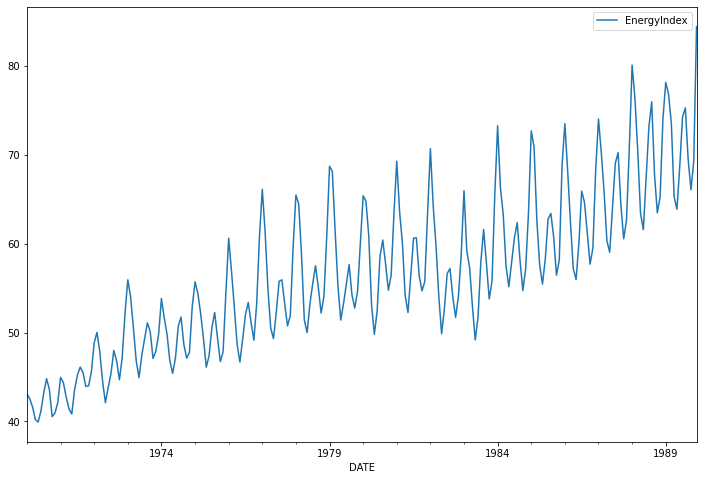

In [7]:
# CODE HERE
df.plot(figsize=(12,8))

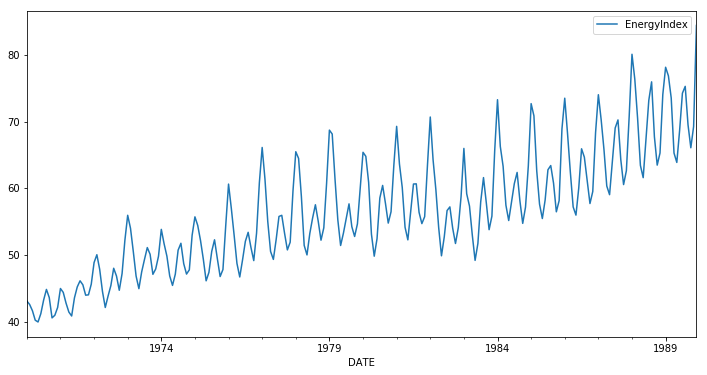

In [3]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

In [13]:
df.drop('12-month-SMA',axis=1,inplace=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


<AxesSubplot:xlabel='DATE'>

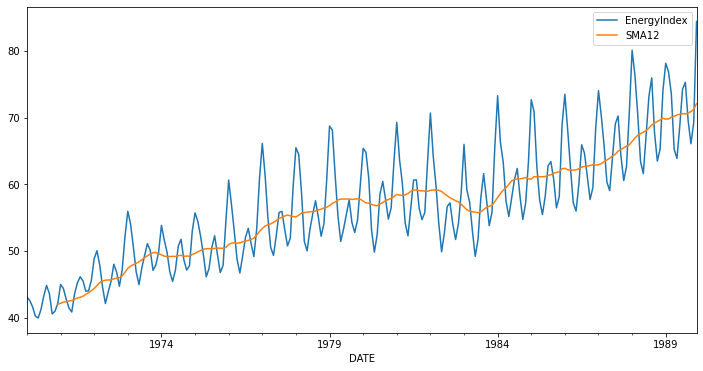

In [14]:

df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df[['EnergyIndex','SMA12']].plot(figsize=(12,6))

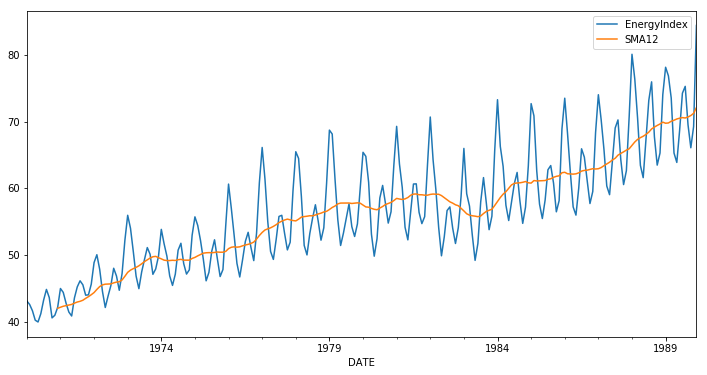

In [4]:
# DON'T WRITE HERE

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

<AxesSubplot:xlabel='DATE'>

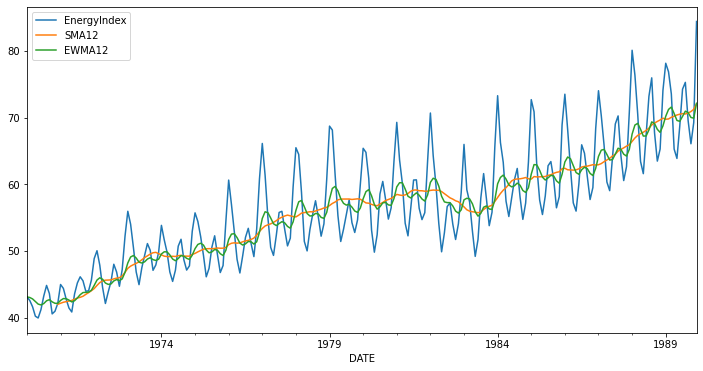

In [15]:
# DON'T FORGET TO PERFORM THE IMPORT!
df['EWMA12'] = df['EnergyIndex'].ewm(span=12,adjust=False).mean()
df.plot(figsize=(12,6))


In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.plot()

ModuleNotFoundError: No module named 'statsmodels'

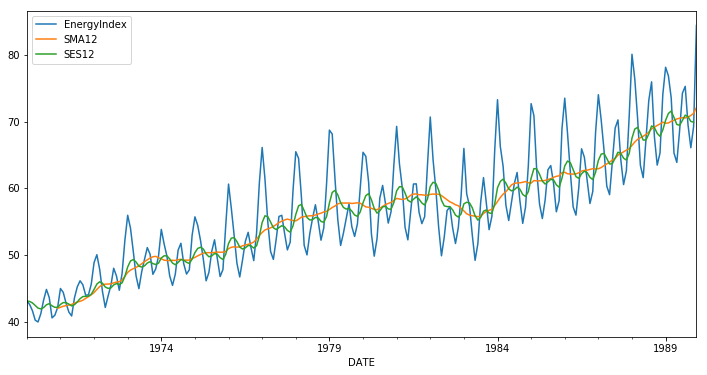

In [5]:
# DON'T WRITE HERE

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [ ]:
# DON'T FORGET TO PERFORM THE IMPORT!




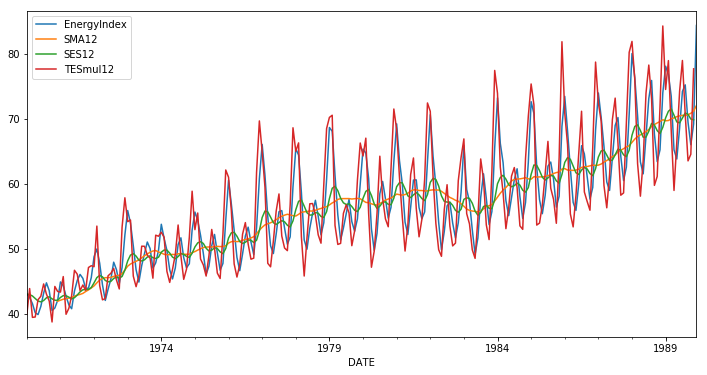

In [6]:
# DON'T WRITE HERE

### OPTIONAL: Plot the same  as above, but for only the first two years.

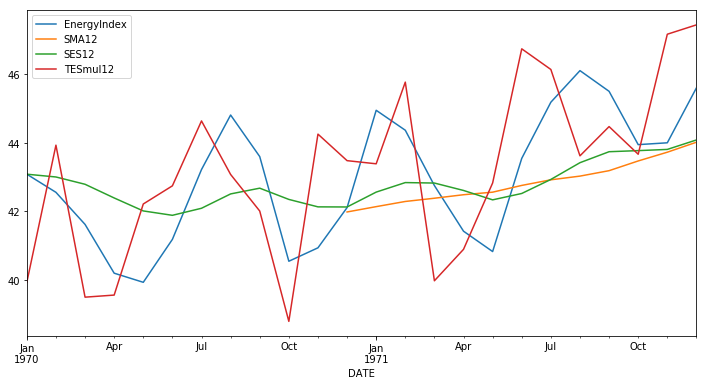

In [7]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

## Great job!